In [12]:
import pandas as pd
from tabulate import tabulate
import traceback
import numpy as np
import matplotlib.pyplot as plt
from requests import get
import requests
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import pandas as pd
df = pd.read_csv("/content/gdrive/MyDrive/Copy of openpowerlifting-2021-12-10-b420db66.csv")
df

<ipython-input-3-63159dfe95d1>:2: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/gdrive/MyDrive/Copy of openpowerlifting-2021-12-10-b420db66.csv")


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569941,Inna Orobets,F,SBD,Single-ply,45.0,45-49,40-49,Open,109.30,84+,...,Yes,Ukraine,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569942,Ágnes Szabó,F,SBD,Single-ply,27.5,24-34,24-39,Open,113.22,84+,...,Yes,Hungary,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569943,Brenda van der Meulen,F,SBD,Single-ply,37.5,35-39,24-39,Open,110.79,84+,...,Yes,Netherlands,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569944,Kelly Phasey,F,SBD,Single-ply,39.5,35-39,40-49,Open,124.53,84+,...,Yes,England,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships


In [5]:
#Top 10 state for Men in 2021
df_2021 = df[df['Date'].str.contains('2021')]
df_state_men_2021 = df_2021.loc[df_2021["Sex"]=="M"].groupby(["State"]).size().to_frame("count").reset_index()
df1_2021 = df_state_men_2021.sort_values(by="count",ascending=False)
print("Top 10 states for Men in 2021")
print(tabulate(df1_2021.head(10), headers='keys', tablefmt='psql'))

#Top 10 state for Women in 2021
df_state_women_2021 = df_2021.loc[df_2021["Sex"]=="F"].groupby(["State"]).size().to_frame("count").reset_index()
df2_2021 = df_state_women_2021.sort_values(by="count",ascending=False)
print("Top 10 states for Women in 2021")
print(tabulate(df2_2021.head(10), headers='keys', tablefmt='psql'))

Top 10 states for Men in 2021
+----+---------+---------+
|    | State   |   count |
|----+---------+---------|
|  7 | CA      |    3384 |
| 70 | TX      |    3037 |
| 16 | FL      |    1781 |
| 51 | OH      |    1529 |
| 55 | PA      |    1183 |
| 72 | VA      |    1156 |
| 38 | NC      |    1109 |
| 50 | NY      |    1033 |
| 17 | GA      |     935 |
| 34 | MO      |     893 |
+----+---------+---------+
Top 10 states for Women in 2021
+----+---------+---------+
|    | State   |   count |
|----+---------+---------|
|  7 | CA      |    1578 |
| 63 | TX      |    1572 |
| 13 | FL      |     921 |
| 47 | OH      |     680 |
| 35 | NC      |     635 |
| 65 | VA      |     542 |
| 46 | NY      |     530 |
| 51 | PA      |     502 |
| 29 | MI      |     478 |
| 24 | LA      |     473 |
+----+---------+---------+


<ipython-input-26-7dfa02f855b8>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sex_counts = df.groupby(['AgeGroup', 'Sex']).size().unstack()


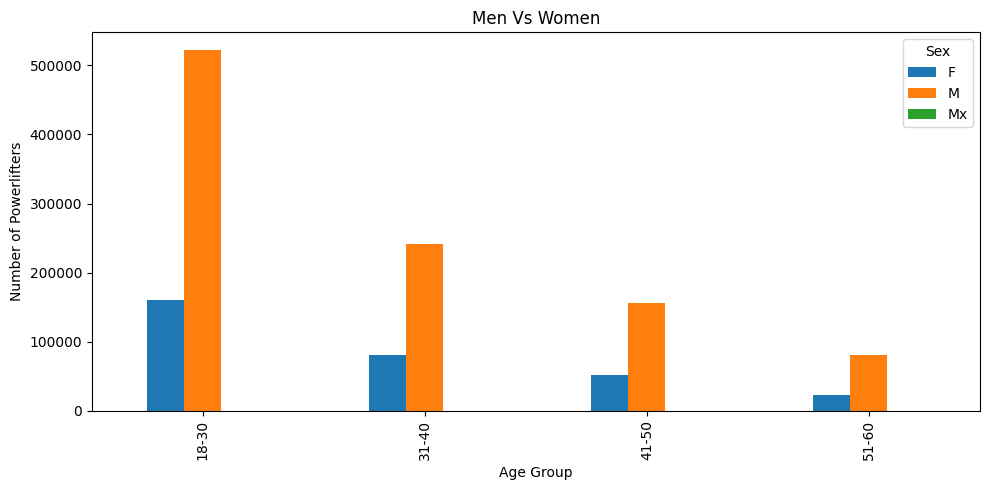

In [26]:
import matplotlib.pyplot as plt
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Convert the list to a NumPy array
age_groups_array = np.array(['18-30', '31-40', '41-50', '51-60'])

# Calculate counts for each age group and sex and unstack the Sex index level to columns
age_sex_counts = df.groupby(['AgeGroup', 'Sex']).size().unstack()

# Plot bar chart
age_sex_counts.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Age Group')
plt.ylabel('Number of Powerlifters')
plt.title('Men Vs Women')
plt.legend(title='Sex')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-38-3ef6c668205a>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sex_counts = df.groupby(['AgeGroup', 'Sex']).size().unstack()


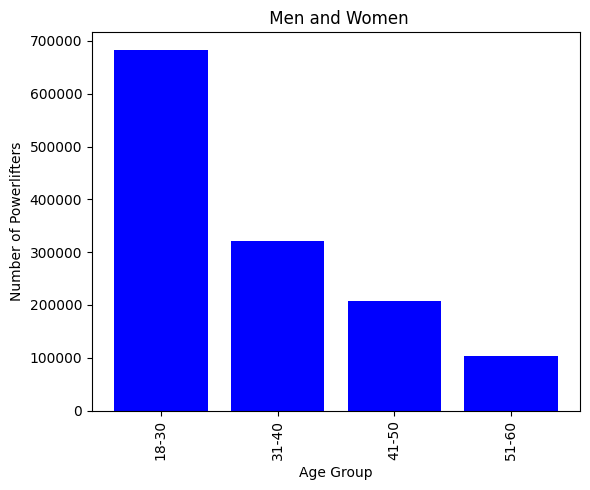

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,AgeGroup,F,M,Mx
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament,31-40,80369,240808,1
1,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament,31-40,80369,240808,1
2,Ruslan Gasanov,M,SBD,Raw,31.5,24-34,24-39,O,102.55,105,...,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament,31-40,80369,240808,1
3,Anton Yurasov,M,SD,Raw,32.0,24-34,24-39,O,104.65,105,...,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament,31-40,80369,240808,1
4,Sergey Zheleznyy,M,BD,Raw,31.5,24-34,24-39,O,86.45,95,...,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament,31-40,80369,240808,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314142,Laura Locatelli,F,SBD,Single-ply,50.0,50-54,50-59,Open,55.80,56,...,IPF,2007-10-14,Austria,NaN,Soelden,World Powerlifting Championships,51-60,23097,80849,0
1314143,Jan Wegiera,M,SBD,Single-ply,50.5,50-54,50-59,Open,92.67,93,...,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,51-60,23097,80849,0
1314144,Ishar Singh,M,SBD,Single-ply,52.5,50-54,50-59,Open,106.18,120,...,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,51-60,23097,80849,0
1314145,Antonietta Orsini,F,SBD,Single-ply,52.0,50-54,50-59,Open,62.21,63,...,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,51-60,23097,80849,0


In [38]:
import matplotlib.pyplot as plt
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Convert the list to a NumPy array
age_groups_array = np.array(['18-30', '31-40', '41-50', '51-60'])

# Calculate counts for each age group and sex and unstack the Sex index level to columns
age_sex_counts = df.groupby(['AgeGroup', 'Sex']).size().unstack()

# Calculate the total count for each age group
total_counts = age_sex_counts.sum(axis=1)

a=pd.merge(df, age_sex_counts, on='AgeGroup')

# Plot the combined bar chart
plt.figure(figsize=(6, 5))
plt.bar(total_counts.index, total_counts, color='blue')
plt.xlabel('Age Group')
plt.ylabel('Number of Powerlifters')
plt.title(' Men and Women')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Display the merged DataFrame 'a' using the display function
display(a) # Use display() to show the DataFrame